# Lab 2: Hand Gesture Recognition

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: 
https://colab.research.google.com/drive/1ynn0qFnnckbErYwK2sVH5awdkXr1l_u9?usp=sharing

# Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN [40 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### Part 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder
) 

In [ ]:
# mount our Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# load "Lab_2_Hand_Gesture_Dataset.zip"(anonymized data provided on Quercus) to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Lab_2_Hand_Gesture_Dataset.zip to Lab_2_Hand_Gesture_Dataset.zip


In [ ]:
# unzip "Lab_2_Hand_Gesture_Dataset.zip"
from zipfile import ZipFile
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_name = 'Lab_2_Hand_Gesture_Dataset.zip'

with ZipFile(file_name,'r') as zipper:
  zipper.extractall(folder_path)

In [ ]:
# the following line of code is extra (delete non-empty folder if mis-created)
#!rm -rf Lab_2_Hand_Gesture_Dataset.zipLab_2_Hand_Gesture_Dataset_Given

In [ ]:
# split images into folders of training, validation, test
import os
import numpy as np
import shutil
# defile folder paths
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
folder_path_given = folder_path + 'Lab_3b_Gesture_Dataset/'
classes = ['A','B','C','D','E','F','G','H','I']

# make some directories to meet requirement of ImageFolder usage
try:
    os.mkdir(folder_path_given + 'train')
except FileExistsError:
    # directory already exists
    pass

try:
    os.mkdir(folder_path_given + 'val')
except FileExistsError:
    # directory already exists
    pass

try:
    os.mkdir(folder_path_given + 'test')
except FileExistsError:
    # directory already exists
    pass

#add seeding for reproducing result
np.random.seed(1517)

# perform dataset split for each class
for class_num_i in range(0,9):
  class_i = classes[class_num_i]
  folder_path_class_i = folder_path_given + class_i + '/'
  filenames_class_i = [entry for entry in os.listdir(folder_path_class_i)]

  # separate images into subgroups of same hand same gesture
  filename_groups_mapping = {}
  for filename in filenames_class_i:
    filename_group = filename.split('_')[0] + '-' + filename.split('_')[1]
    if filename_group not in filename_groups_mapping:
      filename_groups_mapping[filename_group] = []
    filename_groups_mapping[filename_group].append(filename)
  filename_groups_class_i = list(filename_groups_mapping.keys())

  # split the subgroups
  relevant_indices = list(range(0,len(filename_groups_class_i)))
  np.random.shuffle(relevant_indices)
  split_1 = int(len(relevant_indices) * 0.7) # 70% train
  split_2 = int(len(relevant_indices) * 0.85) # another 15% for validation
  relevant_train_indices, relevant_val_indices, relevant_test_indices= relevant_indices[:split_1], relevant_indices[split_1:split_2], relevant_indices[split_2:] 

  # create copy of images in new folder to meet requirement of ImageFolder usage 
  # (leave original copy in case there is error, then no need of re-uploading and re-unzipping)
  target_folder_path = folder_path_given + 'train/class' + str(class_num_i + 1) # start from class 1 as in prelab_2B
  try:
      os.mkdir(target_folder_path)
  except FileExistsError:
      # directory already exists
      pass
  for idx in relevant_train_indices:
    for filename in filename_groups_mapping[filename_groups_class_i[idx]]:
      src_file_path = folder_path_class_i + filename
      shutil.copyfile(src_file_path, target_folder_path + '/' + filename)

  target_folder_path = folder_path_given + 'val/class' + str(class_num_i + 1) # start from class 1 as in prelab_2B
  try:
      os.mkdir(target_folder_path)
  except FileExistsError:
      # directory already exists
      pass
  for idx in relevant_val_indices:
    for filename in filename_groups_mapping[filename_groups_class_i[idx]]:
      src_file_path = folder_path_class_i + filename
      shutil.copyfile(src_file_path, target_folder_path + '/' + filename)

  target_folder_path = folder_path_given + 'test/class' + str(class_num_i + 1) # start from class 1 as in prelab_2B
  try:
      os.mkdir(target_folder_path)
  except FileExistsError:
      # directory already exists
      pass
  for idx in relevant_test_indices:
    for filename in filename_groups_mapping[filename_groups_class_i[idx]]:
      src_file_path = folder_path_class_i + filename
      shutil.copyfile(src_file_path, target_folder_path + '/' + filename)

In [ ]:
# when rerunning (after creating all the previous folders and files), starts here

In [ ]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [ ]:
# load and transform data using ImageFolder

# define training and test data directories
data_dir = '/content/gdrive/My Drive/Colab Notebooks/Lab_3b_Gesture_Dataset/'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'val/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
classes = ['A','B','C','D','E','F','G','H','I']

# convert to tensor with resizing and cropping (this is necessary because some provided images are indeed not 224 * 224)
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(val_data))
print('Num test images: ', len(test_data))

Num training images:  1684
Num validation images:  372
Num test images:  375


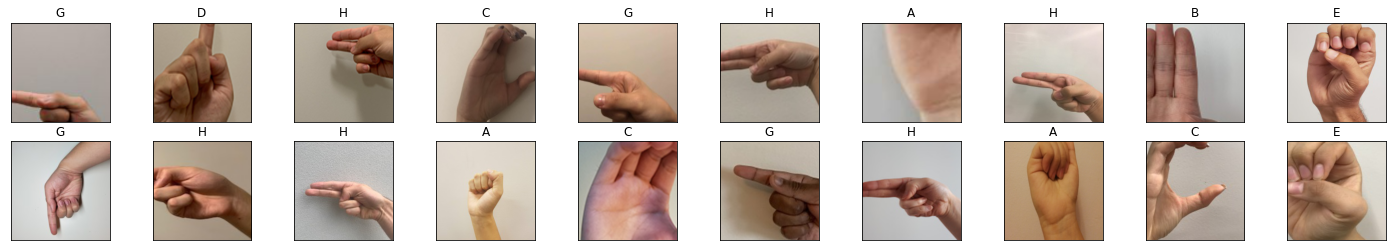

In [ ]:
# view some sample images to verify
# define dataloader parameters
batch_size  = 20
num_workers = 0
torch.manual_seed(1517)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

<font color='red'>
Resizing is required because some provided images are not 224 * 224. I know I can replace RandomResizedCrop with transform.Resize(size=(224,224)) to make all the samples uncropped and look good. But having these bad training set is more exciting. (and there is actually mislabel in the provided images) I am continuing with these cropped (bad) version of samples.
However, I will make sure my own photos would be uncropped to see what is going to happen.

</font>

<font color='blue'>
In the provided dataset, there are about 249 - 273 images for each class (A to I). There are mostly 3 images that have same hand and same gesture. 
<br><br>
As required, if one image of the three is included in training set, the rest cannot be in testing. Therefore, I separate the images into group (each group corresponds to a hand and gesture) and split the dataset on group basis. In addition, to achieve balance in class and consistency of train-validation-test split, I do the dataset split for each class individually. The ratio of train : validation : test applied is 0.7-0.15-0.15. 
<br><br>
Num training images:  1684 <br>
Num validation images:  372 <br>
Num validation images:  375
<br><br>
In this project, when splitting, the images will be rearranged into the folders showed in preLab_2B for the usage of ImageFolder

</font>

### Part 2. Model Building and Sanity Checking [9 pt]

### Part (a) Convolutional Network - 3 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [ ]:
import time
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms

In [ ]:
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.name = "CNN1"
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, stride=2, padding=1) # size after first conv: (224+2*1-3)/2+1 = 112
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=5, stride=2, padding=1) # size after second conv: (112+2*1-5)/2+1= 55
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=10, stride=2, padding=1) # size after third conv: (55+2*1-10)/2+1 = 24
        self.fc1 = nn.Linear(20 * 24 * 24, 50)
        self.fc2 = nn.Linear(50, 9)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 20 * 24 * 24)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

# This is for part 3 (different convolution layers number)
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2) # (224-5+1)/2=110 # (110-5+1)/2=53
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 53 * 53, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

# This is for part 3 (different hidden layers)
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.name = "CNN2"
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, stride=2, padding=1) # size after first conv: (224+2*1-3)/2+1 = 112
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=5, stride=2, padding=1) # size after second conv: (112+2*1-5)/2+1= 55
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=10, stride=2, padding=1) # size after third conv: (55+2*1-10)/2+1 = 24
        self.fc1 = nn.Linear(20 * 24 * 24, 6)
        self.fc2 = nn.Linear(6, 9)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 20 * 24 * 24)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

# This is for part 3 (different hidden layers)
class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.name = "CNN3"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2) # (224-5+1)/2=110 # (110-5+1)/2=53
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 53 * 53, 10)
        self.fc2 = nn.Linear(10, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

<font color='blue'>
Original Design:<br>
I decide to use stride instead of max pooling because it results in less layers (get rid of max pooling layers) but can achieve similar effect. I set stride=2, which is a common value for stride, and causes scanning with kernels more often then stride=3. With stride=2, padding is set to 1 to ensure that every pixel or intermediate input would be covered by kernel at least once. ReLU is used because it is simple and common. (in this case, since the network is not very deep, the issue of gradient vanishing or exploding would be minor, and sigmoid is also reasonable.but ReLU is simpler)<br>
The architecture consists of 3 convolutional layers to detect features of low, medium, and high levels, followed by 2 fully connected layers using the features developed to classify the images. I do not think this problem of classifying gesture is very complex. The image contains only hand, and there is only about 1684 images in training set. So, I think 2 convolutional layers of convolutional network should be enough. Since the input size of the two fully connected layers part (from previous convolutional layer) is large, I decide to use a bigger number of hidden units: 50. The number of output channels increases from 5 to 20 to collect more various higher level features. However, even with 20 output channels at second convolutional layer, the computational cost might be very large... Let's try it out.
<br>---------------------------------------------------------------------<br>
I also try modified version of largeNet from lab 1 (to be able to work on 224 * 224 image input), which ends up being the best model.
<br>---------------------------------------------------------------------<br>
Turn out at the end:<br>
network of 3 convolutional layers is computationally expensive and not functioning. The number of hidden units between the two fully connected layers should be small to prevent overfitting.
<br>---------------------------------------------------------------------<br>
In this project, when splitting, the images will be rearranged into the folders structure showed in preLab_2B for the usage of ImageFolder
<br><br>
Notice: a softmax is applied internally to the output layers when applying nn.CrossEntropyLoss()
</font>

### Part (b) Training Code - 3 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

<font color='blue'>
Explain choice of loss function and optimizer:<br>
Loss function is CrossEntropyLoss, which is commonly used for multiclass classification. optimzer is SGD, it is a common one and considered to be doing better than Adam (also tested in part 3) in converging by many people.<br><br>
Notice: I did not include accuracy evaluation in the training function, because I found it to be computationally expensive. I save the intermediate model parameters, so that I can compute the accuracy outside of training process when it is needed. And I do not think this part requires training curve comparison, that is in part 3.
</font>

In [ ]:
# helper functions
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def get_accuracy(model,data_loader):
    correct = 0
    total = 0
    for imgs, labels in iter(data_loader):
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train_net(model,train_data, batch_size=1, learning_rate=0.001, num_epochs=10):
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1517)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=0, shuffle=False)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            ############################################
            out = model(imgs)             # forward pass

            train_loss = criterion(out, labels) # compute the total loss
            train_loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            
        if (epoch) % 10 ==0:
            model_path = '/content/gdrive/My Drive/Colab Notebooks/'+get_model_name(model.name, batch_size, learning_rate, epoch)
            torch.save(model.state_dict(), model_path) 
            print(("Epoch {}: completed").format(
                    epoch))
        

In [ ]:
# train the model
model = CNN1()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(model, train_data, batch_size=1, learning_rate=0.001, num_epochs=101)

CUDA is available!  Training on GPU ...
Epoch 0: completed
Epoch 10: completed
Epoch 20: completed
Epoch 30: completed
Epoch 40: completed
Epoch 50: completed
Epoch 60: completed
Epoch 70: completed
Epoch 80: completed
Epoch 90: completed
Epoch 100: completed


### Part (c) “Overfit” to a Small Dataset - 3 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

<font color='blue'>
Note: because I take one batch from dataloader as the small dataset, I would throw the whole small dataset to train without batching, so the training function is modified for this reason (no longer use data loader).
</font>

In [ ]:
def get_accuracy_small_set(imgs,labels,model):
    correct = 0
    total = 0
    output = net(imgs)
    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1].flatten()
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
    return correct / total

def train_net_small_set(model,imgs,labels, learning_rate=0.001, num_epochs=10):
    batch_size = 30
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1517)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    iters, train_losses, train_acc = [], [], []
    n = 0 # the number of iterations
    #############################################
    #To Enable GPU Usage
    if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
    ############################################
    for epoch in range(num_epochs):
        out = model(imgs)             # forward pass

        train_loss = criterion(out, labels) # compute the total loss
        train_loss.backward()               # backward pass (compute parameter updates)
        optimizer.step()              # make the updates for each parameter
        optimizer.zero_grad()         # a clean up step for PyTorch

        # output the current training information and save model
        iters.append(n)
        train_losses.append(float(train_loss)/batch_size)             # compute *average* loss
        if (epoch) % 100==0:
          model_path = '/content/gdrive/My Drive/Colab Notebooks/'+get_model_name('small_size_data', batch_size, learning_rate, epoch)
          torch.save(model.state_dict(), model_path)
          print(("Epoch {}: Train loss: {}").format(
                epoch,
                train_losses[epoch]))

In [ ]:
# take 30 images to form small dataset
torch.manual_seed(1517)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=30, num_workers=0, shuffle=True)
for imgs, labels in iter(train_loader):
  small_set_imgs = imgs
  small_set_labels = labels
  break

# train network
model = CNN1()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net_small_set(model, small_set_imgs,small_set_labels, num_epochs=2001)

CUDA is available!  Training on GPU ...
Epoch 0: Train loss: 0.07320429484049479
Epoch 100: Train loss: 0.06078886191050212
Epoch 200: Train loss: 0.034428493181864424
Epoch 300: Train loss: 0.00015746944894393284
Epoch 400: Train loss: 5.6039169430732726e-05
Epoch 500: Train loss: 3.2523239497095346e-05
Epoch 600: Train loss: 2.2360051904494564e-05
Epoch 700: Train loss: 1.678909563149015e-05
Epoch 800: Train loss: 1.3310972523565093e-05
Epoch 900: Train loss: 1.0951659836185476e-05
Epoch 1000: Train loss: 9.257618997556467e-06
Epoch 1100: Train loss: 7.986320997588337e-06
Epoch 1200: Train loss: 7.0017888598764936e-06
Epoch 1300: Train loss: 6.21869209377716e-06
Epoch 1400: Train loss: 5.5817242052095635e-06
Epoch 1500: Train loss: 5.054755213980874e-06
Epoch 1600: Train loss: 4.61198117894431e-06
Epoch 1700: Train loss: 4.235266048150758e-06
Epoch 1800: Train loss: 3.912436174384008e-06
Epoch 1900: Train loss: 3.6307807022240014e-06
Epoch 2000: Train loss: 3.384874192609762e-06


In [ ]:
# evaluate performance
# load model
net = CNN1()
model_path = get_model_name('small_size_data', batch_size=30, learning_rate=0.001, epoch=2000)
folder_path = '/content/gdrive/My Drive/Colab Notebooks/'
file_path = folder_path + model_path
state = torch.load(file_path)
net.load_state_dict(state)

print('accuracy of training set after 2000 epochs:',get_accuracy_small_set(small_set_imgs,small_set_labels,net))

accuracy of training set after 2000 epochs: 1.0


<font color='blue'>
Yes, it does overfit and reaches 100% arruacy. So the network is functional.
</font>

### Part 3. Hyperparameter Search [8 pt]

### Part (a) - 2 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

<font color='blue'>
I think batch size (too small might not converge), learning_rate (make sure speeding up training but converging), number of hidden layers (model architecture, prevent overfitting) of the fully connected layers after convalutional layers. (I also test some other hyperparameters and try other architecture in part b)
</font>

### Part (b) - 2 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

<font color='blue'>
I separate the plotting part from training function. I plot on epoch-basis rather than iteration-basis (which is too computationally expensive). In addition, I plot average loss of whole training dataset rather than just the batch, because average loss of batch is for iteration-basis plotting and is more volatile. <br>
</font>
<font color='red'> - The scaling of train loss output and validation output is different (when I compute mean loss from total loss), but it does not matter much. Let's focus on their trend. <br>
 - the y-axis label of the accuracy curve should be epochs instead of iteration, no time to re-run to correct it. I do not think it matters much.<br>
 - I cannot include more points for plotting a more continuous training loss curve, because Colab would crash (even if I use GPU). Probably because the dataset size is large and the network is large (I test many 3 Conv settings)
</font>


In [ ]:
# prepare dataloader for plotting
train_loader_whole = torch.utils.data.DataLoader(train_data, batch_size=100, 
                                           num_workers=0, shuffle=False)

val_loader_whole = torch.utils.data.DataLoader(val_data, batch_size=100, 
                                           num_workers=0, shuffle=False)


In [ ]:
use_cuda = True

In [ ]:
# plot training curves based on stored models
def plot_model_training_curve(train_data_loader,val_data_loader,max_epoch,model,model_name, batch_size, learning_rate, step_size):
  epochs, train_losses, train_acc, val_losses, val_acc = [], [], [], [], []
  criterion = nn.CrossEntropyLoss()
  i = 0 # loop through epoch 1, 11, 21, ...
  while(i <= max_epoch):
    epochs.append(i)
    file_path = '/content/gdrive/My Drive/Colab Notebooks/'+get_model_name(model_name, batch_size, learning_rate,i)
    state = torch.load(file_path)
    model.load_state_dict(state)
    train_loss = 0
    for imgs,labels in iter(train_data_loader):
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      #############################################
      train_out = model(imgs)
      train_loss += criterion(train_out, labels)
    train_losses.append(train_loss/1684)

    for imgs,labels in iter(val_data_loader):
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      #############################################
      val_out = model(imgs)
      val_loss = criterion(val_out, labels)
    val_losses.append(val_loss/372)
    train_acc.append(get_accuracy(model, train_data_loader)) # compute training accuracy 
    val_acc.append(get_accuracy(model, val_data_loader))  # compute validation accuracy
    i += 100
  # plotting
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.title("Training Curve")
  plt.plot(epochs, train_losses, label="Train")
  plt.plot(epochs, val_losses, label="Validation")
  plt.legend(loc='best')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")

  plt.subplot(1,2,2)
  plt.title("Training Curve")
  plt.plot(epochs, train_acc, label="Train")
  plt.plot(epochs, val_acc, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Training Accuracy")
  plt.legend(loc='best')
  plt.show()

  print("Final Training Accuracy: {}".format(train_acc[-1]))
  print("Final Validation Accuracy: {}".format(val_acc[-1]))

##<font color='blue'>1st setting (3 Conv, batch_size=1, learning_rate=0.001 from part 2 b)</font>

CUDA is available!  Training on GPU ...


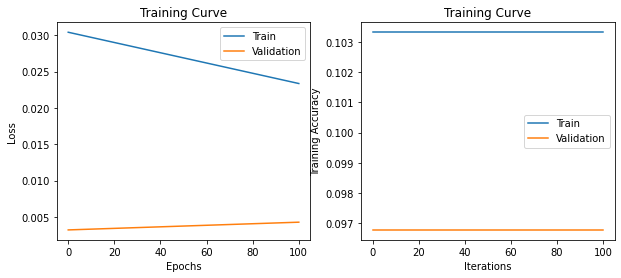

Final Training Accuracy: 0.10332541567695962
Final Validation Accuracy: 0.0967741935483871


In [ ]:
# default settting (from part 2 b)
model = CNN1()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
plot_model_training_curve(train_loader_whole,val_loader_whole,100,model,model.name, 1, 0.001,50)

##<font color='blue'>2nd setting (change batch_size to 200)</font>

In [ ]:
model = CNN1()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(model, train_data, batch_size=200, learning_rate=0.001, num_epochs=201)

CUDA is available!  Training on GPU ...
Epoch 0: completed
Epoch 10: completed
Epoch 20: completed
Epoch 30: completed
Epoch 40: completed
Epoch 50: completed
Epoch 60: completed
Epoch 70: completed
Epoch 80: completed
Epoch 90: completed
Epoch 100: completed
Epoch 110: completed
Epoch 120: completed
Epoch 130: completed
Epoch 140: completed
Epoch 150: completed
Epoch 160: completed
Epoch 170: completed
Epoch 180: completed
Epoch 190: completed
Epoch 200: completed


CUDA is available!  Training on GPU ...


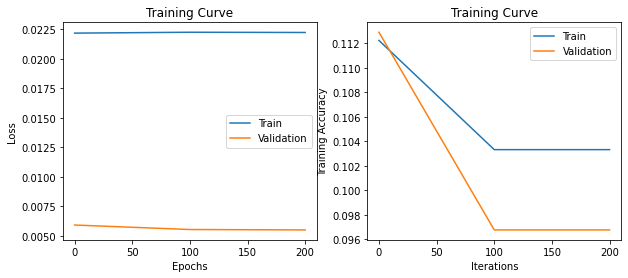

Final Training Accuracy: 0.10332541567695962
Final Validation Accuracy: 0.0967741935483871


In [ ]:
model = CNN1()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
plot_model_training_curve(train_loader_whole,val_loader_whole,200,model,model.name, 200, 0.001,100)

In [ ]:
# run the following line of code if cuda is full
torch.cuda.empty_cache()

##<font color='blue'>3rd setting (2 convolutional layers, learning rate 0.001, batch_size remains 200)</font>
(modified from LargeNet)

In [ ]:
model = LargeNet()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(model, train_data, batch_size=200, learning_rate=0.001, num_epochs=201)

CUDA is available!  Training on GPU ...
Epoch 0: completed
Epoch 10: completed
Epoch 20: completed
Epoch 30: completed
Epoch 40: completed
Epoch 50: completed
Epoch 60: completed
Epoch 70: completed
Epoch 80: completed
Epoch 90: completed
Epoch 100: completed
Epoch 110: completed
Epoch 120: completed
Epoch 130: completed
Epoch 140: completed
Epoch 150: completed
Epoch 160: completed
Epoch 170: completed
Epoch 180: completed
Epoch 190: completed
Epoch 200: completed


CUDA is not available.  Training on CPU ...


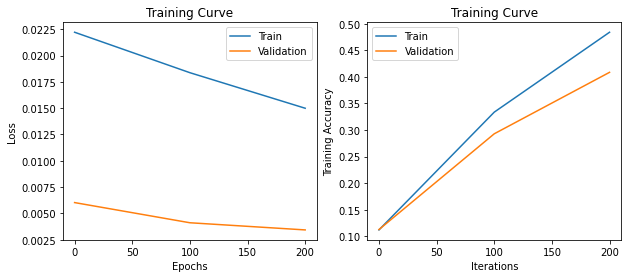

Final Training Accuracy: 0.4839667458432304
Final Validation Accuracy: 0.40860215053763443


In [ ]:
model = LargeNet()
use_cuda = False

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
plot_model_training_curve(train_loader_whole,val_loader_whole,200,model,model.name, 200, 0.001,100)

##<font color='blue'>4th setting (2 convolutional layers, learning rate 0.002, batch_size remains 200)</font>
(quite similar to the previous one but with greater learning rate to speed up training and more epochs.)

<font color='red'>This is the best one found.</font>

In [ ]:
model = LargeNet()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(model, train_data, batch_size=200, learning_rate=0.002, num_epochs=301)

CUDA is available!  Training on GPU ...
Epoch 0: completed
Epoch 10: completed
Epoch 20: completed
Epoch 30: completed
Epoch 40: completed
Epoch 50: completed
Epoch 60: completed
Epoch 70: completed
Epoch 80: completed
Epoch 90: completed
Epoch 100: completed
Epoch 110: completed
Epoch 120: completed
Epoch 130: completed
Epoch 140: completed
Epoch 150: completed
Epoch 160: completed
Epoch 170: completed
Epoch 180: completed
Epoch 190: completed
Epoch 200: completed
Epoch 210: completed
Epoch 220: completed
Epoch 230: completed
Epoch 240: completed
Epoch 250: completed
Epoch 260: completed
Epoch 270: completed
Epoch 280: completed
Epoch 290: completed
Epoch 300: completed


CUDA is not available.  Training on CPU ...


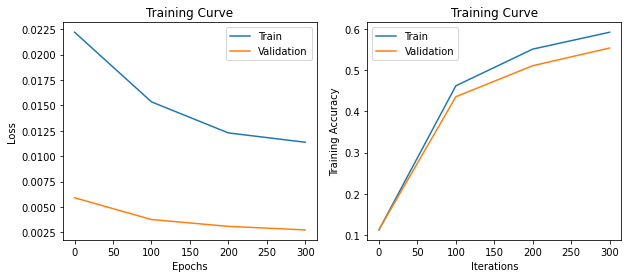

Final Training Accuracy: 0.5920427553444181
Final Validation Accuracy: 0.553763440860215


In [ ]:
model = LargeNet()
use_cuda = False

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
plot_model_training_curve(train_loader_whole,val_loader_whole,300,model,model.name, 200, 0.002,150)

##<font color='blue'>5th setting (2 convolutional layers, learning rate 0.008, batch_size 100)</font>
(quite similar to the previous one but with even greater learning rate and smaller batch size to add some volatility.)

In [ ]:
model = LargeNet()
use_cuda = False

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(model, train_data, batch_size=100, learning_rate=0.008, num_epochs=101)


CUDA is not available.  Training on CPU ...
Epoch 0: completed
Epoch 10: completed
Epoch 20: completed
Epoch 30: completed
Epoch 40: completed
Epoch 50: completed
Epoch 60: completed
Epoch 70: completed
Epoch 80: completed
Epoch 90: completed
Epoch 100: completed


CUDA is not available.  Training on CPU ...


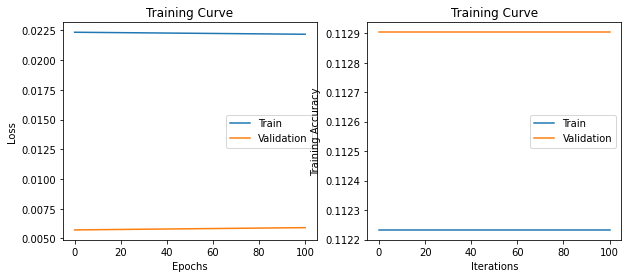

Final Training Accuracy: 0.11223277909738717
Final Validation Accuracy: 0.11290322580645161


In [ ]:
model = LargeNet()
use_cuda = False

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
plot_model_training_curve(train_loader_whole,val_loader_whole,100,model,model.name, 100, 0.008,50)

##<font color='blue'>6th Setting (3 Conv, learning rate 0.01, batch_size 200)</font>

(large learning rate compared to other setting to try to save 3 Conv in case it is just converging too slowly (training curve hardly moves after hundreds of epochs...)

In [ ]:
model = CNN1()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(model, train_data, batch_size=200, learning_rate=0.01, num_epochs=201)

CUDA is available!  Training on GPU ...
Epoch 0: completed
Epoch 10: completed
Epoch 20: completed
Epoch 30: completed
Epoch 40: completed
Epoch 50: completed
Epoch 60: completed
Epoch 70: completed
Epoch 80: completed
Epoch 90: completed
Epoch 100: completed
Epoch 110: completed
Epoch 120: completed
Epoch 130: completed
Epoch 140: completed
Epoch 150: completed
Epoch 160: completed
Epoch 170: completed
Epoch 180: completed
Epoch 190: completed
Epoch 200: completed


CUDA is not available.  Training on CPU ...


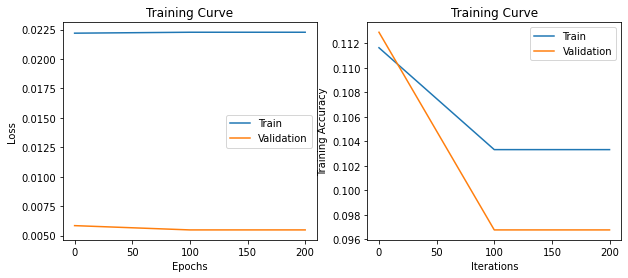

Final Training Accuracy: 0.10332541567695962
Final Validation Accuracy: 0.0967741935483871


In [ ]:
model = CNN1()
use_cuda = False

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
plot_model_training_curve(train_loader_whole,val_loader_whole,200,model,model.name, 200, 0.01,100)

##<font color='blue'>7th setting (3 Conv, learning rate 0.01, batch_size 200, Adam optimizer)</font>

(changing to adam does not seem to make any change.)

In [ ]:
# alternative setting 4(adam optimizer)
def train_net_adam(model,train_data, batch_size=1, learning_rate=0.001, num_epochs=10):
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1517)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=0, shuffle=False)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            ############################################
            out = model(imgs)             # forward pass

            train_loss = criterion(out, labels) # compute the total loss
            train_loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            
        if (epoch) % 10 ==0:
            model_path = '/content/gdrive/My Drive/Colab Notebooks/'+get_model_name(model.name+'_adam_', batch_size, learning_rate, epoch)
            torch.save(model.state_dict(), model_path) 
            print(("Epoch {}: completed").format(
                    epoch))

# alternative setting 3(adam optimizer)
model = CNN1()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net_adam(model, train_data, batch_size=200, learning_rate=0.01, num_epochs=201)

CUDA is available!  Training on GPU ...
Epoch 0: completed
Epoch 10: completed
Epoch 20: completed
Epoch 30: completed
Epoch 40: completed
Epoch 50: completed
Epoch 60: completed
Epoch 70: completed
Epoch 80: completed
Epoch 90: completed
Epoch 100: completed
Epoch 110: completed
Epoch 120: completed
Epoch 130: completed
Epoch 140: completed
Epoch 150: completed
Epoch 160: completed
Epoch 170: completed
Epoch 180: completed
Epoch 190: completed
Epoch 200: completed


CUDA is available!  Training on GPU ...


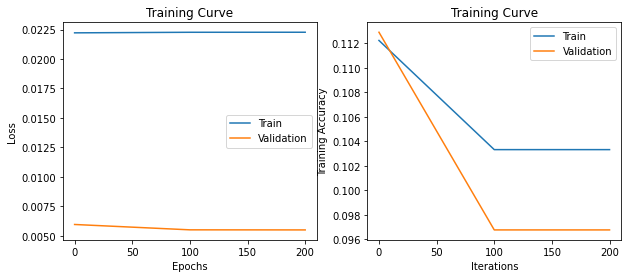

Final Training Accuracy: 0.10332541567695962
Final Validation Accuracy: 0.0967741935483871


In [ ]:
model = CNN1()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
plot_model_training_curve(train_loader_whole,val_loader_whole,200,model,model.name+'_adam_', 200, 0.01,100)

##<font color='blue'>8th setting (3 Conv, learning rate 0.001, batch_size 200, 6 hidden units)</font>

In [ ]:
# alternative setting 5 (6 hidden units)
model = CNN2()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(model, train_data, batch_size=200, learning_rate=0.001, num_epochs=201)

CUDA is available!  Training on GPU ...
Epoch 0: completed
Epoch 10: completed
Epoch 20: completed
Epoch 30: completed
Epoch 40: completed
Epoch 50: completed
Epoch 60: completed
Epoch 70: completed
Epoch 80: completed
Epoch 90: completed
Epoch 100: completed
Epoch 110: completed
Epoch 120: completed
Epoch 130: completed
Epoch 140: completed
Epoch 150: completed
Epoch 160: completed
Epoch 170: completed
Epoch 180: completed
Epoch 190: completed
Epoch 200: completed


CUDA is available!  Training on GPU ...


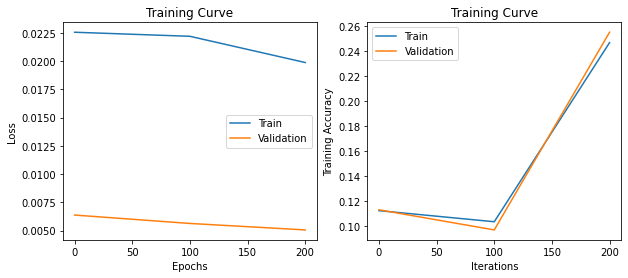

Final Training Accuracy: 0.24703087885985747
Final Validation Accuracy: 0.2553763440860215


In [ ]:
model = CNN2()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
plot_model_training_curve(train_loader_whole,val_loader_whole,200,model,model.name, 200, 0.001,100)

##<font color='blue'>9th setting (2 Conv with 10 hidden units (less than previous 32))</font>
(accuracy not growing as fast)

In [ ]:
model = CNN3()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(model, train_data, batch_size=200, learning_rate=0.001, num_epochs=201)

CUDA is available!  Training on GPU ...
Epoch 0: completed
Epoch 10: completed
Epoch 20: completed
Epoch 30: completed
Epoch 40: completed
Epoch 50: completed
Epoch 60: completed
Epoch 70: completed
Epoch 80: completed
Epoch 90: completed
Epoch 100: completed
Epoch 110: completed
Epoch 120: completed
Epoch 130: completed
Epoch 140: completed
Epoch 150: completed
Epoch 160: completed
Epoch 170: completed
Epoch 180: completed
Epoch 190: completed
Epoch 200: completed


CUDA is not available.  Training on CPU ...


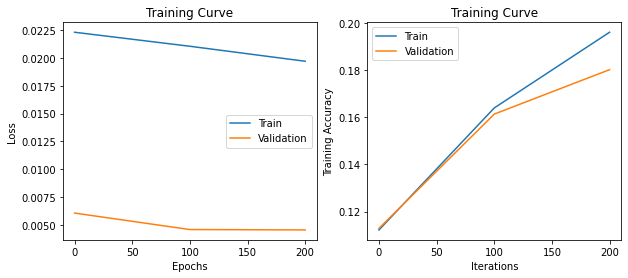

Final Training Accuracy: 0.19596199524940616
Final Validation Accuracy: 0.18010752688172044


In [ ]:
model = CNN3()
use_cuda = False

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
plot_model_training_curve(train_loader_whole,val_loader_whole,200,model,model.name, 200, 0.001,100)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

<font color='blue'>
The best model is the 4th model (modified from LargeNet) with batch_size=200, learning_rate=0.002, num_epochs=301, with training accuracy 0.5920427553444181 and validation accuracy: 0.553763440860215. <br>
There are only a few models can have accuracy growing when being trained. This model reaches the highest training accuracy and highest validation accuracy. It can actually still be inproved by continuing training, since the slope of training curve of accuracy still appears to be quite positive. In addition, it is not overfitted. However, I do not have time do more training. Its validation accuracy 0.55 is good enough, considering the quality of my dataset after cropping, some mislabeling, and there are 9 classes.
</font>


In [ ]:
best_model = LargeNet()
file_path = '/content/gdrive/My Drive/Colab Notebooks/'+get_model_name(best_model.name, 200, 0.002,300)
state = torch.load(file_path)
best_model.load_state_dict(state)

<All keys matched successfully>

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
# generate and store features for test set
# take whole test dataset
test_loader_whole = torch.utils.data.DataLoader(test_data, batch_size=375, 
                                           num_workers=0, shuffle=False)

for images, labels in iter(test_loader_whole):
  test_images = images
  test_labels = labels

In [ ]:
output = best_model(test_images)
correct = 0
total = 0
#select index with maximum prediction score
pred = output.max(1, keepdim=True)[1].flatten()
correct += pred.eq(test_labels.view_as(pred)).sum().item()
total += test_images.shape[0]
print('test accuracy:',correct / total)

test accuracy: 0.5786666666666667


<font color='blue'>
This value is in between the validation accuracy and test accuracy, which is great.<br>
Yes, the test set used here has never been used previously.
</font>

### Part 4. Transfer Learning [8 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 2 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# run separately (Colab will crash due to RAM limit)
# generate and store features for training set
# take whole training dataset
train_loader_whole = torch.utils.data.DataLoader(train_data, batch_size=1684, 
                                           num_workers=0, shuffle=False)

for images, labels in iter(train_loader_whole):
  train_images = images
  train_labels = labels

# apply alexnet
train_alexnet_features = alexnet.features(train_images)

# save resultant features and labels
torch.save(train_alexnet_features, '/content/gdrive/My Drive/Colab Notebooks/alexnet_features_train.pt')
torch.save(train_labels, '/content/gdrive/My Drive/Colab Notebooks/labels_train.pt')


In [ ]:
# check tensor shape, correct!
train_alexnet_features.shape

torch.Size([1684, 256, 6, 6])

In [ ]:
# run separately (Colab will crash due to RAM limit)
# generate and store features for validation set
# take whole validation dataset
val_loader_whole = torch.utils.data.DataLoader(val_data, batch_size=372, 
                                           num_workers=0, shuffle=False)

for images, labels in iter(val_loader_whole):
  val_images = images
  val_labels = labels

# apply alexnet
val_alexnet_features = alexnet.features(val_images)

# save resultant features and labels
torch.save(val_alexnet_features, '/content/gdrive/My Drive/Colab Notebooks/alexnet_features_val.pt')
torch.save(val_labels, '/content/gdrive/My Drive/Colab Notebooks/labels_val.pt')


In [ ]:
# generate and store features for test set
# take whole test dataset
test_loader_whole = torch.utils.data.DataLoader(test_data, batch_size=375, 
                                           num_workers=0, shuffle=False)

for images, labels in iter(test_loader_whole):
  test_images = images
  test_labels = labels

# apply alexnet
test_alexnet_features = alexnet.features(test_images)

# save resultant features and labels
torch.save(test_alexnet_features, '/content/gdrive/My Drive/Colab Notebooks/alexnet_features_test.pt')
torch.save(test_labels, '/content/gdrive/My Drive/Colab Notebooks/labels_test.pt')


**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

<font color='blue'>
Yes, it has been saved at the same cell with the generation of features (a file for train, validation, test respectively) above.
</font>

### Part (b) - 2 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

<font color='blue'>
Alexnet do the hard work of generating feature maps. So, the rest of the model can just make use of the feature maps developed. Two fully connected layers network is used here. Number of input needs to match output of AlexNet (256 * 6 * 6). And the number output needs to match the number of classes (9). Number of hidden layers has been tuned, 6 is found to be the best. (There is also an implicit softmax layer at the end)
</font>

In [ ]:
#Artifical Neural Network Architecture
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.name = "alexnet_ANN"
        self.fc1 = nn.Linear(256 * 6 * 6, 6)
        self.fc2 = nn.Linear(6, 9)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def get_accuracy_alexnet(model, imgs, labels):

    correct = 0
    total = 0 
    #############################################
    #To Enable GPU Usage
    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    #############################################  
    output = model(imgs)
    
    #select index with maximum prediction score
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
    return correct / total

# the input of training function now includes images and labels (not using data loader)
def train_net_alexnet(model,train_imgs,train_labels,val_imgs,val_labels, learning_rate=0.001, num_epochs=10):
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    n = 0 # the number of iterations
    iters, train_losses, val_losses, train_acc, val_acc = [], [], [], [], []
    #############################################
    #To Enable GPU Usage
    if use_cuda and torch.cuda.is_available():
        train_imgs = train_imgs.cuda()
        train_labels = train_labels.cuda()
    ############################################
    for epoch in range(num_epochs):
        out = model(train_imgs)             # forward pass
        train_loss = criterion(out, train_labels) # compute the total loss
        train_loss.backward()               # backward pass (compute parameter updates)
        optimizer.step()              # make the updates for each parameter
        optimizer.zero_grad()         # a clean up step for PyTorch

        # save the current training information
        iters.append(n)
        train_losses.append(float(train_loss)/1684)             # compute *average* loss
        train_acc.append(get_accuracy_alexnet(model, train_imgs, train_labels)) # compute training accuracy 
        val_acc.append(get_accuracy_alexnet(model, val_imgs, val_labels))  # compute validation accuracy
        n += 1

        # if (epoch) % 10 ==0:
        #     model_path = '/content/gdrive/My Drive/Colab Notebooks/'+get_model_name(model.name + '_alexnet_', batch_size, learning_rate, epoch)
        #     torch.save(model.state_dict(), model_path) 
        #     print(("Epoch {}: completed").format(
        #             epoch))

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, train_losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))  
        
        

In [ ]:
# features = ... load precomputed alexnet.features(img) ...
#output = model(features)
#prob = F.softmax(output)

### Part (c) - 2 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

<font color='blue'>
I have tuned number of hidden units of the 2 fully connected layers network, 6 is found to be the best. Learning rate is also tested, not making noticeable difference. Since the network is now less complex (no need to include training of convolutional part), I prefer not to use batch size and train on the whole training set. (of, course, overfitting might be more severe in this case)<br><br>
In my case, PyTorch is not tracking updates to the AlexNet weights. I saved the features as .pt file first then loaded it again. I checked its type and content, it is just a pure tensor.
</font>

CUDA is available!  Training on GPU ...


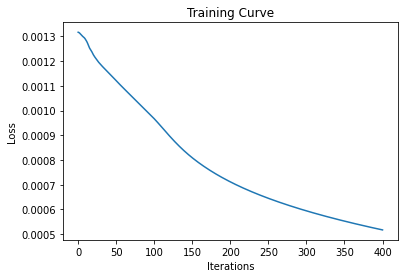

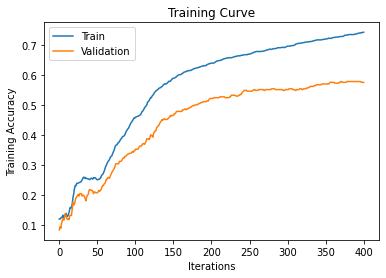

Final Training Accuracy: 0.7422802850356295
Final Validation Accuracy: 0.5752688172043011


In [ ]:
use_cuda = True
torch.manual_seed(1517)
model = ANNClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_alexnet_features = torch.load('/content/gdrive/My Drive/Colab Notebooks/alexnet_features_train.pt')
train_labels = torch.load('/content/gdrive/My Drive/Colab Notebooks/labels_train.pt')
val_alexnet_features = torch.load('/content/gdrive/My Drive/Colab Notebooks/alexnet_features_val.pt')
val_labels = torch.load('/content/gdrive/My Drive/Colab Notebooks/labels_val.pt')

#proper model
# only a 2 fully connected layers network now, so not using batches to speed up and for volatility
train_net_alexnet(model,train_alexnet_features,train_labels,val_alexnet_features,val_labels, learning_rate=0.001, num_epochs=401)

<font color='blue'>
There is overfitting. However, validation set have not started to decay so it is fine.
</font>

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

<font color='blue'>
test accuracy of my best model is 0.5706. It is very close but slightly less than test accuracy of Part 3(d) without transfer learning. Alexnet uses much more data, but its feature maps are not optimized for gestures.
</font>

In [ ]:
test_alexnet_features = torch.load('/content/gdrive/My Drive/Colab Notebooks/alexnet_features_test.pt')
labels = torch.load('/content/gdrive/My Drive/Colab Notebooks/labels_test.pt')
test_alexnet_features = test_alexnet_features.cuda()
labels = labels.cuda()
output = model(test_alexnet_features)
correct = 0
total = 0
#select index with maximum prediction score
pred = output.max(1, keepdim=True)[1].flatten()

correct += pred.eq(labels.view_as(pred)).sum().item()
total += test_alexnet_features.shape[0]
print('test accuracy:',correct / total)

test accuracy: 0.5706666666666667


### Part 5. Testing on New Data [10 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted with your lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 



### Part (a) - 3 pt
Load and process the hand gesture images you had collected so that they can easily be evaulated by your model.

<font color='blue'>
For this part's loading data, I will just create the folders on Google Drive and structure them manually so that ImageFolder can be directly applied. (it would just be uploading, upzipping, makedir and moving files if doing it by coding, which is easier than the split of train-validation-test data at the beginning)
</font>

In [ ]:
# convert to tensor
new_data_transform = transforms.Compose([transforms.ToTensor()])
new_data = datasets.ImageFolder('/content/gdrive/My Drive/Colab Notebooks/Own_Gesture_Dataset/', transform=new_data_transform)


In [ ]:
# separate images and labels
new_loader = torch.utils.data.DataLoader(new_data, batch_size=27, 
                                          num_workers=0, shuffle=False)
dataiter = iter(new_loader)
new_images, new_labels = dataiter.next()

### Part (b) - 7 pt
Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?  

This question will also be evaluated on the overal performance achieved.

In [ ]:
# test accuracy on my sample images (best model from part 3d)
best_model = LargeNet()
file_path = '/content/gdrive/My Drive/Colab Notebooks/'+get_model_name(best_model.name, 200, 0.002,300)
state = torch.load(file_path)
best_model.load_state_dict(state)
output = best_model(new_images)
correct = 0
total = 0
#select index with maximum prediction score
pred = output.max(1, keepdim=True)[1].flatten()
correct += pred.eq(new_labels.view_as(pred)).sum().item()
total += new_images.shape[0]
print('test accuracy:',correct / total)

test accuracy: 1.0


<font color='blue'>
Great result! I am proud of my own network!
</font>

In [ ]:
# apply alexnet to new images to generate features
new_alexnet_features = alexnet.features(new_images)

# save resultant features and labels
torch.save(new_alexnet_features, '/content/gdrive/My Drive/Colab Notebooks/alexnet_features_new.pt')
torch.save(new_labels, '/content/gdrive/My Drive/Colab Notebooks/labels_new.pt')

In [ ]:
# best transfer learning model in part 4
new_alexnet_features = torch.load('/content/gdrive/My Drive/Colab Notebooks/alexnet_features_new.pt')
labels = torch.load('/content/gdrive/My Drive/Colab Notebooks/labels_new.pt')
new_alexnet_features = new_alexnet_features.cuda()
labels = labels.cuda()
output = model(new_alexnet_features)
correct = 0
total = 0
#select index with maximum prediction score
pred = output.max(1, keepdim=True)[1].flatten()

correct += pred.eq(labels.view_as(pred)).sum().item()
total += new_alexnet_features.shape[0]
print('test accuracy:',correct / total)

test accuracy: 0.8518518518518519


<font color='red'>The accuracies of both models get higher because the images previously used are all randomly cropped (and some are even mislabeled).</font>

In [ ]:
performance_matrix = np.zeros((9,9))

for i in range(27):
  performance_matrix[labels[i],pred[i]] += 1

In [ ]:
performance_matrix

array([[3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3.]])

<font color='blue'>
The alexnet network makes mistake of (1 F into I) and (3 G into H) <br>
This model has difficulty classifying G from H. This makes sense, because they are close visually.<br>
Again, my own model beats alexnet. This is understandable because the convolutional layers of alexnet is fixed and not optimized for classifying hand gesture.<br>
Even though I use cropped images for training, validation, and (old) test sets, the network can still learn well. Maybe the poor quality makes the network focus on the most important features. The accuracy is boosted up when applying to correctly labeled uncropped images.
</font>

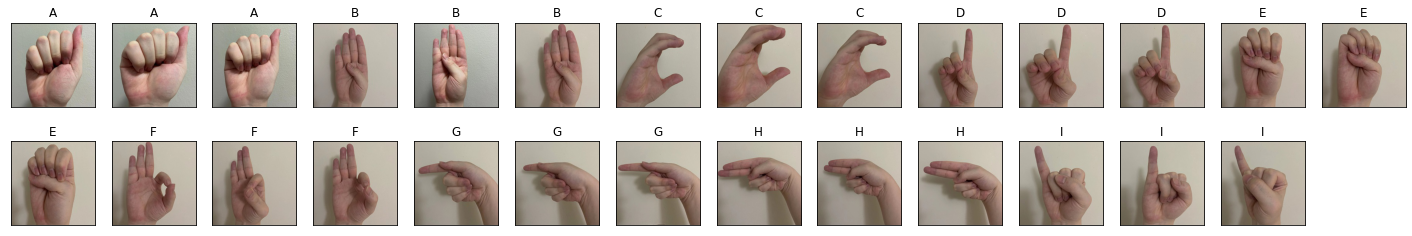

In [ ]:
classes = ['A','B','C','D','E','F','G','H','I']

images = new_images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(27):
    ax = fig.add_subplot(2, 28/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(new_images[idx], (1, 2, 0)))
    ax.set_title(classes[new_labels[idx]])

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html LAB_2_Hand_Gesture_Recognition.ipynb

[NbConvertApp] Converting notebook LAB_2_Hand_Gesture_Recognition.ipynb to html
[NbConvertApp] Writing 1540525 bytes to LAB_2_Hand_Gesture_Recognition.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus